Диагностические инструменты

Пример кейса:  разработка и обучение свёрточной нейронной сети (CNN) для классификации изображений

Вам необходимо разработать (можно взять за основу небольшие рабочие архитектуры, такие как LeNet, AlexNet) свёрточную сеть и обучить ее для классификации изображений на выбранном наборе данных с небольшими размерами изображений (например, MNIST, FashionMNIST, CIFAR-10 и подобные). 


1. Аугментация данных (Data Augmentation)
Это процесс увеличения размера обучающей выборки за счет создания новых данных из исходных. Например, для изображений можно использовать следующие трансформации:

Повороты (Rotation)

Масштабирование (Scaling)

Отражение (Flipping)

Изменение яркости или контраста (Brightness, Contrast Adjustments)

Сдвиги и обрезка (Shifts and Cropping)

Это помогает улучшить обобщающую способность модели, так как она обучается на более разнообразных данных.

2. Dropout

Dropout — это метод регуляризации, который заключается в случайном "выключении" (занулении) некоторых нейронов в сети во время обучения. Это предотвращает излишнее приспособление модели к обучающим данным. Dropout особенно полезен в полносвязных слоях, но также может применяться и в сверточных слоях.

3. Раннее остановка (Early Stopping)

Это метод, при котором обучение модели прекращается, когда точность на проверочной выборке перестает улучшаться или начинает ухудшаться. Это позволяет избежать того момента, когда модель начинает слишком хорошо "запоминать" обучающие данные, что ведет к переобучению.

4. L2-регуляризация (Weight Decay)

Этот метод добавляет штраф за слишком большие веса в функции потерь. L2-регуляризация помогает сделать веса сети меньше, что предотвращает сильное приспособление модели к особенностям обучающих данных. Это один из наиболее распространенных методов регуляризации.

5. Увеличение объема данных

Если это возможно, следует собирать больше данных для обучения модели. Больший объем данных помогает модели лучше учиться и обобщать, снижая риск переобучения.

6. Batch Normalization

Нормализация пакетов данных помогает ускорить обучение и уменьшить зависимость от начальных значений параметров. Она также выступает в качестве регуляризатора, что помогает бороться с переобучением.

7. Изменение архитектуры модели

Если сеть слишком сложная для имеющихся данных, это может привести к переобучению. 
Уменьшение количества слоев или фильтров в сверточных слоях может помочь улучшить обобщающую способность модели.

8. Добавление шума (Noise Injection)

Шум можно добавлять непосредственно в данные или в слои модели. Это помогает сети стать более устойчивой к небольшим изменениям в данных и лучше обобщать их.

9. Кросс-валидация

Кросс-валидация помогает выявить, когда модель начинает переобучаться. Вместо того чтобы использовать одну проверочную выборку, кросс-валидация делит данные на несколько частей и многократно обучает модель на различных сочетаниях обучающих и проверочных выборок.



Пример кейса:  разработка и обучение свёрточной нейронной сети (CNN) для классификации изображений

Вам необходимо разработать (можно взять за основу небольшие рабочие архитектуры, такие как LeNet, AlexNet) свёрточную сеть и обучить ее для классификации изображений на выбранном наборе данных с небольшими размерами изображений (например, MNIST, FashionMNIST, CIFAR-10 и подобные). 

Задачи:

1. Разработайте архитектуру свёрточной нейронной сети для задачи классификации изображений. Опишите ваши соображения при выборе слоев (тип, количество, последовательность) и гиперпараметров (размер фильтров, их количества, функции активации и другие).

2. Подготовьте все необходимые элементы для процесса обучения из инструментария pytorch: загрузчики данных, необходимую функцию потерь. Загрузить данные для обучения (предобработка данных: перевод в тензорный вид, при необходимости — изменеие размеров изображений — resize).

3. Обучите модель на подготовленном наборе данных.

4. Оцените качество обучения модели на тестовой выборке (по функции потерь — validation loss и точности — accuracy).

5. Реализуйте один (на выбор) из следующих метод борьбы с переобучением:
- cлой Dropout (если не было в разработанной архитектуре)
- cлой BatchNorm (если не было в разработанной архитектуре)
- регуляризация функции потерь,
- техники data augmentation (дополнение данных — модификация копий изображений в обучающей выборке)

6. Подготовьте краткий отчет (в свободной форме) с описанием выполненных шагов, архитектуры модели, процесса обучения, полученных результатов. Сделайте краткие выводы. Приложите к отчету визуализации (графики метрик обучения — loss, accuracy, примеры предсказаний сети).


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [5]:
# Определение архитектуры свёрточной нейронной сети (CNN)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # BatchNorm для борьбы с переобучением
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)  # Dropout для борьбы с переобучением
    
    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
#     **Преобразование в одномерный вектор**:
#    - `x.view(-1, 64 * 8 * 8)`: Изменяет форму тензора для подготовки 
# к полносвязанным слоям. Число `64 * 8 * 8` предполагает, что выход из 
# предыдущего слоя преобразован в одномерный вектор с такой размерностью. 
# `-1` используется для динамического определения размера batch.

In [7]:
# Data Augmentation и предобработка данных
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Аугментация данных (случайное горизонтальное отражение)
    transforms.RandomCrop(32, padding=4),  # Аугментация данных (случайное обрезание)
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

In [8]:
# Загрузка данных CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████████████████████████████████████████████████████████| 170498071/170498071 [00:10<00:00, 15997114.95it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


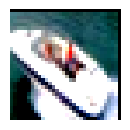

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


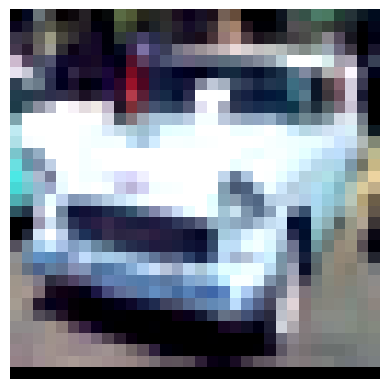

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


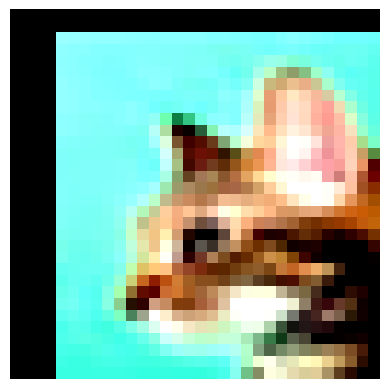

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


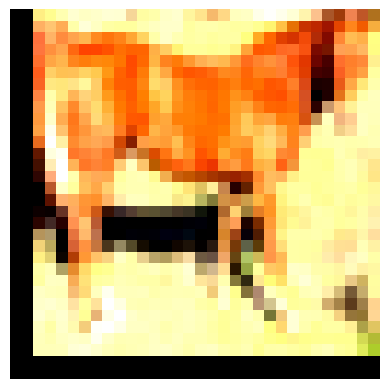

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


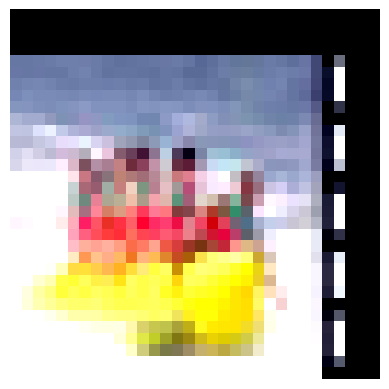

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


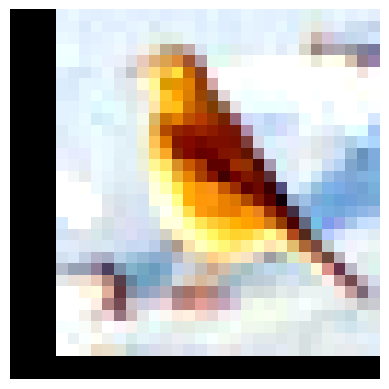

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


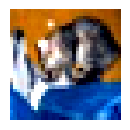

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


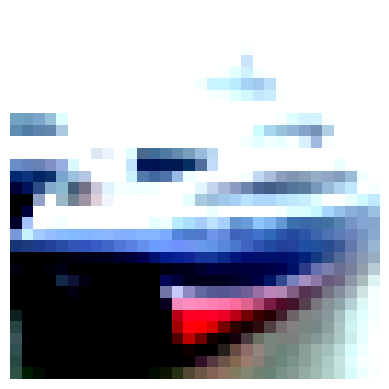

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


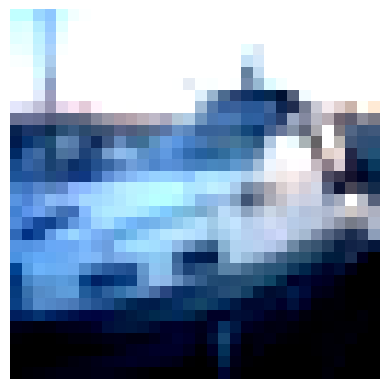

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


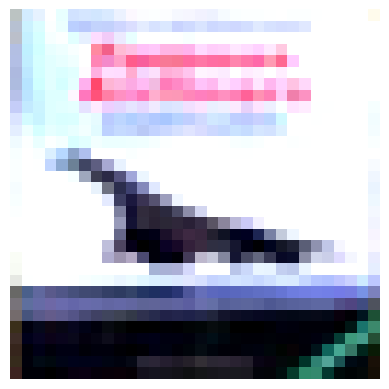

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


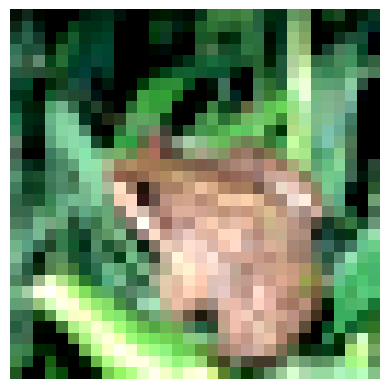

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


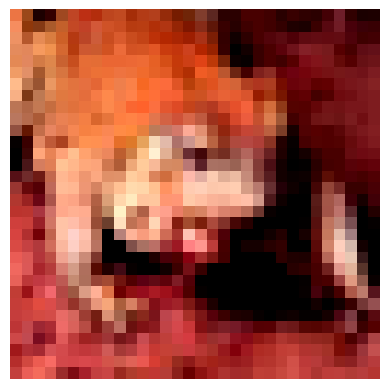

In [16]:
# Импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import numpy as np

# Функция для отображения изображений
def imshow(img):
    # Перевод из нормализованного диапазона [-1, 1] в диапазон [0, 1]
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Визуализация нескольких примеров из загрузчика данных
def visualize_data_loader_samples(data_loader, num_samples=6):
    # Получаем батч данных
    data_iter = iter(data_loader)
    images, labels = next(data_iter)

    # Отображаем несколько изображений
    fig = plt.figure(figsize=(10, 4))
    for idx in range(num_samples):
        ax = fig.add_subplot(1, num_samples, idx + 1, xticks=[], yticks=[])
        imshow(images[idx])
        ax.set_title(f'Label: {labels[idx].item()}')

# Визуализируем примеры из обучающего набора
visualize_data_loader_samples(trainloader, num_samples=6)

# Визуализируем примеры из тестового набора
visualize_data_loader_samples(testloader, num_samples=6)


In [9]:
# Инициализация модели, функции потерь и оптимизатора
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
#  Функция обучения модели
def train_model(num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(trainloader):.4f}')


In [11]:
# Функция оценки качества на тестовой выборке
def evaluate_model():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')

In [12]:
# Обучение модели
num_epochs = 10
train_model(num_epochs)


Epoch [1/10], Loss: 1.6855
Epoch [2/10], Loss: 1.4205
Epoch [3/10], Loss: 1.3056
Epoch [4/10], Loss: 1.2388
Epoch [5/10], Loss: 1.1897
Epoch [6/10], Loss: 1.1485
Epoch [7/10], Loss: 1.1094
Epoch [8/10], Loss: 1.0769
Epoch [9/10], Loss: 1.0497
Epoch [10/10], Loss: 1.0287


In [13]:
# Оценка модели
evaluate_model()

Test Accuracy: 71.70%


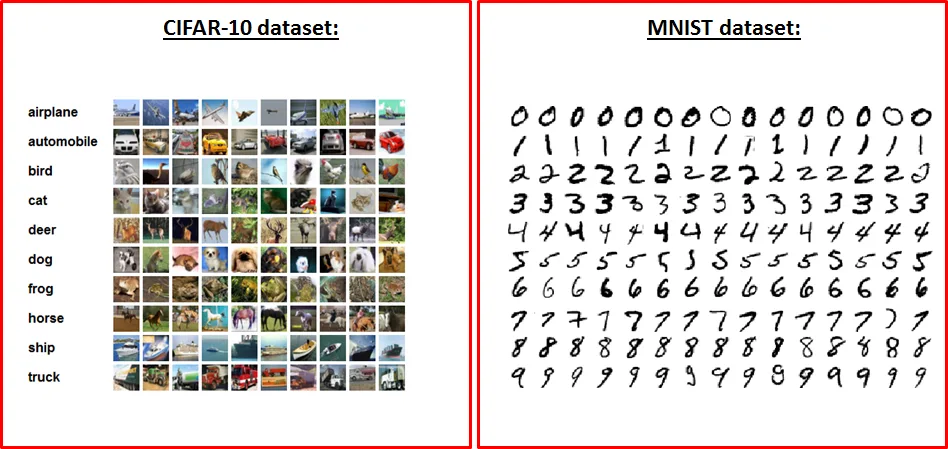

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Функция для обучения с сохранением потерь и точности для визуализации
def train_model_with_tracking(num_epochs):
    train_loss_history = []
    train_accuracy_history = []
    
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Подсчёт точности
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(trainloader)
        epoch_accuracy = 100 * correct / total

        train_loss_history.append(epoch_loss)
        train_accuracy_history.append(epoch_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

    return train_loss_history, train_accuracy_history

# Визуализация потерь и точности
def plot_loss_accuracy(loss_history, accuracy_history):
    epochs = range(1, len(loss_history) + 1)

    plt.figure(figsize=(12, 5))

    # График потерь
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_history, 'r', label='Training loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # График точности
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy_history, 'b', label='Training accuracy')
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.show()

# Функция для отображения матрицы путаницы и примеров предсказаний
def visualize_predictions():
    model.eval()
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Матрица путаницы
    cm = confusion_matrix(all_labels, all_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Визуализация нескольких реальных и предсказанных классов
    fig = plt.figure(figsize=(12, 8))
    for i in range(6):
        ax = fig.add_subplot(2, 3, i+1)
        img, label = testset[i]
        ax.imshow(np.transpose(img.numpy(), (1, 2, 0)))
        ax.set_title(f'Predicted: {all_predictions[i]}, Real: {label}')
        ax.axis('off')

    plt.show()

# Запуск обучения с отслеживанием метрик
num_epochs = 100
train_loss_history, train_accuracy_history = train_model_with_tracking(num_epochs)

# Визуализация графиков потерь и точности
plot_loss_accuracy(train_loss_history, train_accuracy_history)

# Визуализация матрицы путаницы и предсказанных классов
visualize_predictions()


Epoch [1/100], Loss: 0.8818, Accuracy: 69.57%
Epoch [2/100], Loss: 0.8766, Accuracy: 69.83%
Epoch [3/100], Loss: 0.8688, Accuracy: 70.07%
Epoch [4/100], Loss: 0.8532, Accuracy: 70.49%
Epoch [5/100], Loss: 0.8537, Accuracy: 70.51%
Epoch [6/100], Loss: 0.8482, Accuracy: 70.70%
Epoch [7/100], Loss: 0.8418, Accuracy: 70.98%
Epoch [8/100], Loss: 0.8338, Accuracy: 71.40%
Epoch [9/100], Loss: 0.8233, Accuracy: 71.48%
Epoch [10/100], Loss: 0.8215, Accuracy: 71.69%
Epoch [11/100], Loss: 0.8113, Accuracy: 72.13%
Epoch [12/100], Loss: 0.8095, Accuracy: 72.11%
Epoch [13/100], Loss: 0.8016, Accuracy: 72.47%
Epoch [14/100], Loss: 0.7939, Accuracy: 72.71%
Epoch [15/100], Loss: 0.7914, Accuracy: 72.83%
Epoch [16/100], Loss: 0.7867, Accuracy: 72.82%
Epoch [17/100], Loss: 0.7931, Accuracy: 72.71%
Epoch [18/100], Loss: 0.7818, Accuracy: 73.14%
Epoch [19/100], Loss: 0.7853, Accuracy: 73.06%
Epoch [20/100], Loss: 0.7766, Accuracy: 73.29%
Epoch [21/100], Loss: 0.7708, Accuracy: 73.57%
Epoch [22/100], Loss: 

Архитектура LeNet — это классическая нейронная сеть, предложенная Яном Лекуном
в 1998 году для задачи классификации изображений, таких как распознавание
рукописных цифр на наборе данных MNIST.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        # Первый сверточный слой: вход 1 канал, выход 6 каналов, ядро 5x5
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        
        # Второй сверточный слой: вход 6 каналов, выход 16 каналов, ядро 5x5
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        
        # Полносвязные слои
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # вход 16*5*5, выход 120
        self.fc2 = nn.Linear(120, 84)          # вход 120, выход 84
        self.fc3 = nn.Linear(84, 10)           # вход 84, выход 10 классов (для MNIST)

    def forward(self, x):
        # Первый сверточный слой + активация + пулинг
        x = F.relu(self.conv1(x))  # активация ReLU
        x = F.max_pool2d(x, 2)     # пулинг 2x2
        
        # Второй сверточный слой + активация + пулинг
        x = F.relu(self.conv2(x))  # активация ReLU
        x = F.max_pool2d(x, 2)     # пулинг 2x2
        
        # Вытягивание тензора в плоский вид перед подачей в полносвязный слой
        x = x.view(-1, 16 * 5 * 5)
        
        # Первый полносвязный слой + активация
        x = F.relu(self.fc1(x))
        
        # Второй полносвязный слой + активация
        x = F.relu(self.fc2(x))
        
        # Выходной слой (без активации, т.к. Softmax будет применен в функции потерь)
        x = self.fc3(x)
        
        return x

# Проверим, что сеть строится корректно
net = LeNet()
print(net)

# Пример использования сети с случайными данными
input_data = torch.randn(1, 1, 32, 32)  # случайный входной тензор (1 изображение 1x32x32)
output = net(input_data)
print(output.shape)
